In [1]:
import torch
import torch.cuda
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import sklearn as sk
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import os
import seaborn as sns
import requests, tarfile

import numpy as np

In [2]:
# CONSTANTS
GENDER = ['M', 'F']
ETHNICITY = ['White', 'Black', 'Asian', 'Indian', 'Others']

# HELPER FUNCTIONS
def arrayAge(data):
    res = []
    for (age, _, __) in data:
        res.append(age)
    return np.array(res)

def genderToStr(num):
    return GENDER[num]

def arrayGenderToStr(data):
    res = []
    for (_, gender, __) in data:
        res.append(genderToStr(gender))
    return np.array(res)

def ethnicityToStr(num):
    return ETHNICITY[num]

def arrayEthnicityToStr(data):
    res = []
    for (_, __, ethnicity) in data:
        res.append(ethnicityToStr(ethnicity))
    return np.array(res)

def histPlot(labels, title, yLabel, xLabel, bins):
    plt.title(title, size=16)
    sns.histplot(x = labels, bins = bins)
    plt.ylabel(yLabel, size=12)
    plt.xlabel(xLabel, size=12)
    sns.despine(top=True, right=True, left=False, bottom=False)
    plt.show()

def countPlot(labels, title, yLabel, xLabel):
    plt.title(title, size=16)
    ax = sns.countplot(x = labels)
    plt.ylabel(yLabel, size=12)
    plt.xlabel(xLabel, size=12)
    sns.despine(top=True, right=True, left=False, bottom=False)

    total = len(labels)
    for p in ax.patches:
        height = p.get_height()
        percentage = f'{100 * height / total:.1f}%'
        ax.text(p.get_x() + p.get_width() / 2,
                height + 5,
                percentage,
                ha='center')
        
    plt.show()

In [3]:
dataPath = 'UTKFace'
if (dataPath not in os.listdir()):
    print("Downloading UTKFace...")
    url = "https://drive.google.com/uc?export=download&id=0BxYys69jI14kYVM3aVhKS1VhRUk&confirm=t&uuid=f981ca1d-ba0f-40c9-a4a0-8eaa887f3b6d&at=ANzk5s7e36SgjT0FlqBbRiijefRg:1681897584880"

    response = requests.get(url, stream=True)
    file = tarfile.open(fileobj=response.raw, mode="r|gz")
    file.extractall(path=".")
    print("Download complete.")
else:
    print("UTKFace already downloaded.")

UTKFace already downloaded.


In [4]:
data = []
labels = []

for imagePath in os.listdir(dataPath):
    try:
        imageTensor = torchvision.io.read_image(f'{dataPath}/{imagePath}')
        fileName = imagePath.split('_')
        labels.append((int(fileName[0]), int(fileName[1]), int(fileName[2])))
        data.append(imageTensor)
    except:
        pass

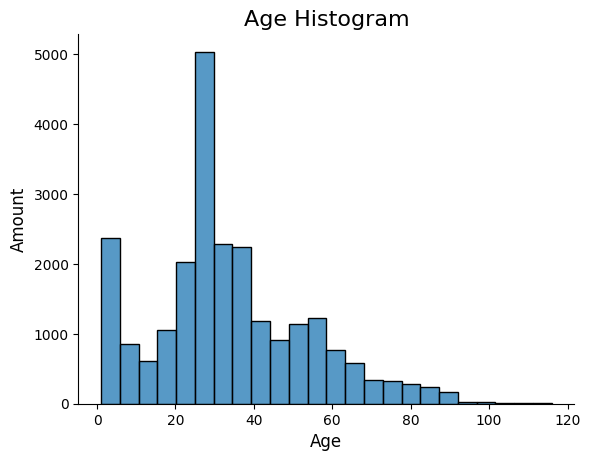

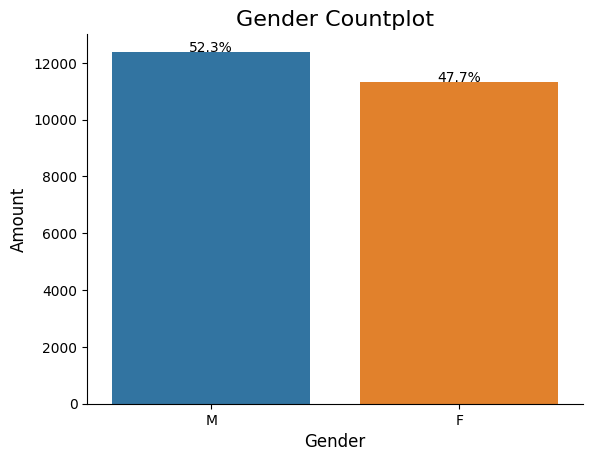

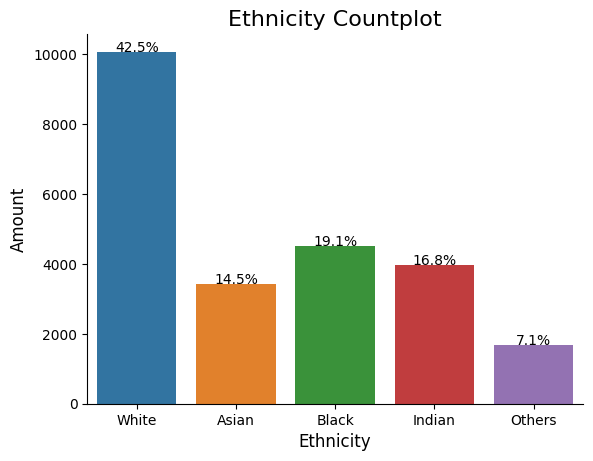

In [5]:
histPlot(arrayAge(labels), 'Age Histogram', 'Amount', 'Age', bins=24)
countPlot(arrayGenderToStr(labels), 'Gender Countplot', 'Amount', 'Gender')
countPlot(arrayEthnicityToStr(labels), 'Ethnicity Countplot', 'Amount', 'Ethnicity')